# Assignment 3: COVID-19 Analysis
## Author: Lei Cao

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Graph 1: Line Plot (Choose the top 10 affected countries, and make a line plot, with different colors for each of the countries). Make nice axes with titles. Add text to the plot.

In [ ]:
# Download the raw confirmed data
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url1)
# View the data
confirmed

Province/State         Country/Region  ...  4/6/20  4/7/20
0                            NaN            Afghanistan  ...     367     423
1                            NaN                Albania  ...     377     383
2                            NaN                Algeria  ...    1423    1468
3                            NaN                Andorra  ...     525     545
4                            NaN                 Angola  ...      16      17
..                           ...                    ...  ...     ...     ...
258  Falkland Islands (Malvinas)         United Kingdom  ...       2       2
259    Saint Pierre and Miquelon                 France  ...       1       1
260                          NaN            South Sudan  ...       1       2
261                          NaN         Western Sahara  ...       4       4
262                          NaN  Sao Tome and Principe  ...       4       4

[263 rows x 81 columns]

In [ ]:
# Sum up data of each province/state for every country/region
sum_data = pd.DataFrame(confirmed.groupby('Country/Region').sum())
# Subset the data without latitudes and longitudes
sum_data = sum_data.drop(['Lat', 'Long'], axis=1)
sum_data

1/22/20  1/23/20  1/24/20  ...  4/5/20  4/6/20  4/7/20
Country/Region                                 ...                        
Afghanistan               0        0        0  ...     349     367     423
Albania                   0        0        0  ...     361     377     383
Algeria                   0        0        0  ...    1320    1423    1468
Andorra                   0        0        0  ...     501     525     545
Angola                    0        0        0  ...      14      16      17
...                     ...      ...      ...  ...     ...     ...     ...
Vietnam                   0        2        2  ...     241     245     249
West Bank and Gaza        0        0        0  ...     237     254     261
Western Sahara            0        0        0  ...       4       4       4
Zambia                    0        0        0  ...      39      39      39
Zimbabwe                  0        0        0  ...       9      10      11

[184 rows x 77 columns]

In [ ]:
# Filter the top 10 countries/regions that are effected by COVID-19
top10 = sum_data.nlargest(10, sum_data.columns[-1])
# Transpose the dataframe for plotting
top10 = top10.T
print(top10.shape)
top10.head()

(77, 10)


Country/Region  US  Spain  Italy  ...  United Kingdom  Turkey  Switzerland
1/22/20          1      0      0  ...               0       0            0
1/23/20          1      0      0  ...               0       0            0
1/24/20          2      0      0  ...               0       0            0
1/25/20          2      0      0  ...               0       0            0
1/26/20          5      0      0  ...               0       0            0

[5 rows x 10 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


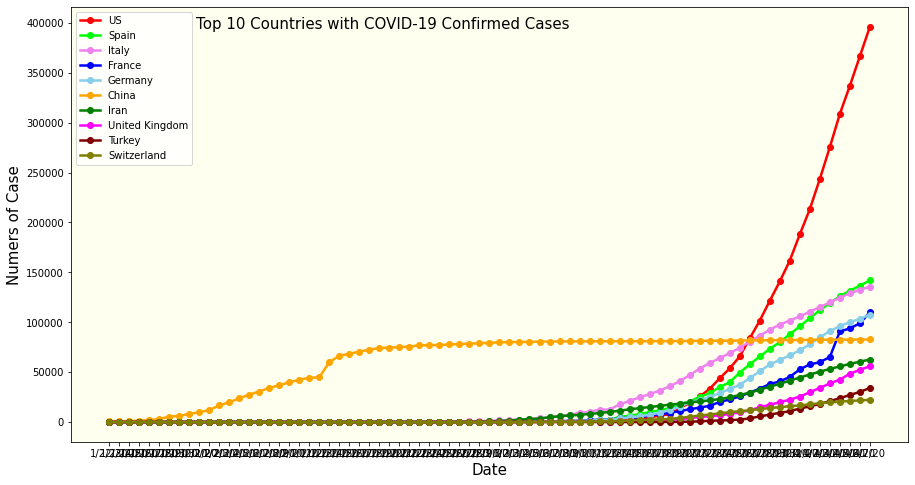

In [ ]:
# Plot the lind graph
plt.figure(figsize=(15,8))
color_list = ['red', 'lime', 'violet', 'blue','skyblue', 'orange', 'green', 'magenta', 'maroon', 'olive']

for (column, color) in zip(top10, color_list):
  plt.plot(column, data=top10, marker='o', markerfacecolor=color, markersize=6, color=color, linewidth=2.5)
  plt.legend()
  
ax = plt.axes()
ax.set_facecolor('ivory')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Numers of Case', fontsize=15)
plt.text(0.15, 0.95, 'Top 10 Countries with COVID-19 Confirmed Cases', fontsize=15, transform=ax.transAxes)

plt.show()

### Graph 2: Bubble Plot - the size of the bubble will correspond to the number of Confirmed Cases.

In [ ]:
!pip install geopandas
import geopandas as gpd

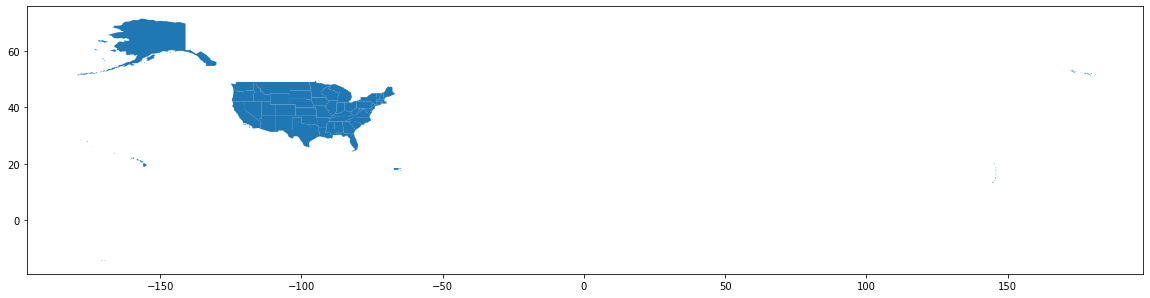

In [ ]:
# Read the shape data for the US
fp = '/content/drive/My Drive/5512 Spring 2020/Week 10-Mar 25/March 16 2020_ Daves COVID Plots in R/tl_2019_us_state/tl_2019_us_state.shp'
USA = gpd.read_file(fp)
# Plot the map
USA.plot(figsize=(20,20))

In [ ]:
# Download the raw confirmed data with province/state records
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv'
specific = pd.read_csv(url2)
# View the data
specific

Province/State         Country/Region      Lat  ...  3/21/20  3/22/20  3/23/20
0              NaN               Thailand  15.0000  ...      411      599    599.0
1              NaN                  Japan  36.0000  ...     1007     1086   1086.0
2              NaN              Singapore   1.2833  ...      432      455    455.0
3              NaN                  Nepal  28.1667  ...        1        2      2.0
4              NaN               Malaysia   2.5000  ...     1183     1306   1306.0
..             ...                    ...      ...  ...      ...      ...      ...
496            NaN                 Jersey  49.1900  ...        0        0      0.0
497            NaN            Puerto Rico  18.2000  ...        0        0      0.0
498            NaN  Republic of the Congo  -1.4400  ...        0        0      0.0
499            NaN            The Bahamas  24.2500  ...        0        0      0.0
500            NaN             The Gambia  13.4667  ...        0        0      0.0

[501 rows x 66 columns]

In [ ]:
# Subset the data for only the US records
us_data = specific[specific['Country/Region']=='US']
us_data.to_csv('~/us_data.csv')
us_data

Province/State Country/Region  ...  3/22/20  3/23/20
98                     Washington             US  ...     1996   1996.0
99                       New York             US  ...    15793  15793.0
100                    California             US  ...     1642   1642.0
101                 Massachusetts             US  ...      646    646.0
102              Diamond Princess             US  ...       49     49.0
..                            ...            ...  ...      ...      ...
417                   Puerto Rico             US  ...       23     23.0
431                          Guam             US  ...       27     27.0
448                Virgin Islands             US  ...        3      NaN
491  United States Virgin Islands             US  ...        0      6.0
492                            US             US  ...        0      1.0

[249 rows x 66 columns]

In [ ]:
# Subset the data
geo_data = pd.DataFrame(us_data.iloc[:, [2,3,-1]])
# Create the geometry column for the coordinate of each state
geo_data = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.Long, geo_data.Lat))
# Drop the original latitude and longitude columns
geo_data = geo_data.iloc[:, 2:]
# Fill N/A
geo_data.iloc[:,0] = geo_data.iloc[:,0].fillna(us_data.iloc[:, -2])
# Create a column for a sequence of colors
bins = [-1, 100, 500, 1000, 10000, 10000000]
labels = ['xkcd:eggshell', 'xkcd:peach', 'xkcd:coral', 'xkcd:red', 'xkcd:maroon']
geo_data['colors_as'] = pd.cut(geo_data.iloc[:, 0], bins=bins, labels=labels)

geo_data

3/23/20                     geometry      colors_as
98    1996.0  POINT (-121.49050 47.40090)       xkcd:red
99   15793.0   POINT (-74.94810 42.16570)    xkcd:maroon
100   1642.0  POINT (-119.68160 36.11620)       xkcd:red
101    646.0   POINT (-71.53010 42.23020)     xkcd:coral
102     49.0   POINT (139.63800 35.44370)  xkcd:eggshell
..       ...                          ...            ...
417     23.0   POINT (-66.59010 18.22080)  xkcd:eggshell
431     27.0   POINT (144.79370 13.44430)  xkcd:eggshell
448      3.0   POINT (-64.89630 18.33580)  xkcd:eggshell
491      6.0   POINT (-64.89630 18.33580)  xkcd:eggshell
492      1.0   POINT (-95.71290 37.09020)  xkcd:eggshell

[249 rows x 3 columns]

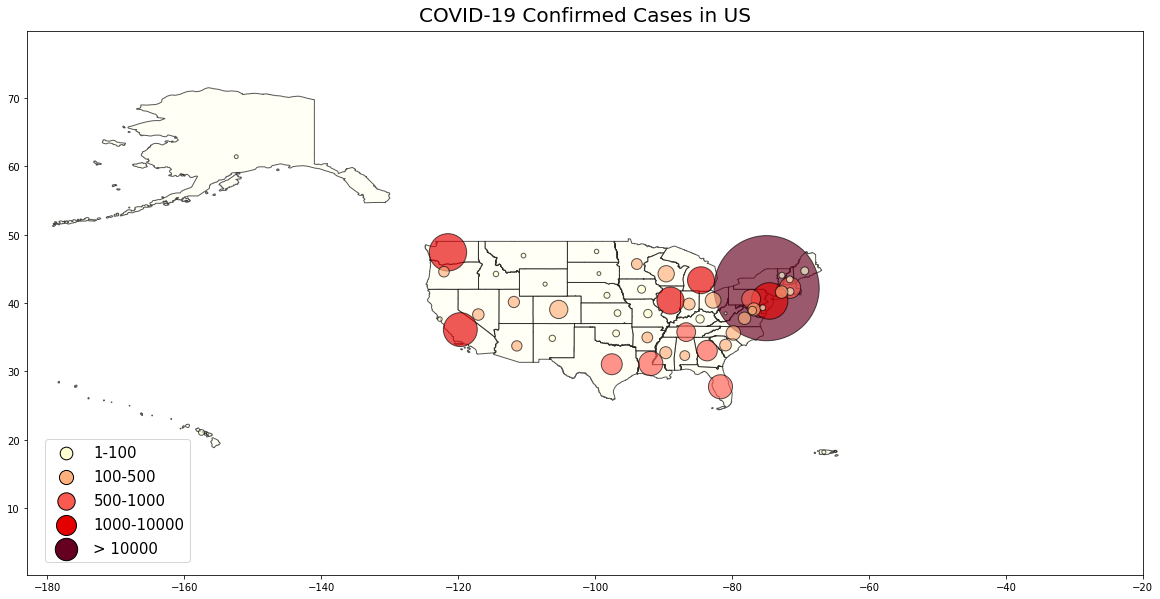

In [ ]:
# Plot the bubble plot
fig, ax = plt.subplots(1, figsize=(20,10))

base = USA.plot(ax=ax, 
                color='ivory', 
                edgecolor='black', 
                linewidth=1,
                alpha=0.65)

geo = geo_data.plot(ax=base,
                    marker='o',
                    c=geo_data['colors_as'],
                    markersize = geo_data.iloc[:, 0] / 10 * 7,
                    edgecolor='black',
                    alpha=0.65)

ax.set_title('COVID-19 Confirmed Cases in US', fontsize=20, pad=10)
plt.axis('equal')

ax.set_xlim(-183, -20) # Set a limit for the min and max longitudes
ax.set_ylim(25, 55) # Set a limit for the min and max latitudes

ax.scatter([0], [0], c='xkcd:eggshell', alpha=1, s=8/10*200,
            label='1-100', edgecolor='black')
ax.scatter([0], [0], c='xkcd:peach', alpha=1, s=10/10*200,
            label='100-500', edgecolor='black')
ax.scatter([0], [0], c='xkcd:coral', alpha=1, s=15/10*200,
            label='500-1000', edgecolor='black')
ax.scatter([0], [0], c='xkcd:red', alpha=1, s=20/10*200,
            label='1000-10000', edgecolor='black')
ax.scatter([0], [0], c='xkcd:maroon', alpha=1, s=25/10*200,
            label='> 10000', edgecolor='black')

ax.legend(scatterpoints=1, frameon=True,
          labelspacing=0.6, loc='lower left', fontsize=15,
          bbox_to_anchor=(0.01,0.01), title_fontsize=15)

plt.show()

### Graph 3: Colored Table with a graphic on it

In [ ]:
# Transpose the sum_data
table = sum_data.T
# Reset the index and rename the date column for convenience in further operations 
table = table.reset_index().rename(columns={'index': 'Date'})
# Convert the data type for the date column
import random
table['Date'] = pd.to_datetime(table['Date']).dt.strftime('%m/%d')

# Create a new column for multiindexxing
conditions = [table['Date'] <= '03/09',
              (table['Date'] > '03/09') & (table['Date'] <= '03/25'),
              table['Date'] > '03/25']
choices = ['Earliest Stage', 'Earlier Stage', 'Current Stage']
table['Stage'] = np.select(conditions, choices, default='black')
# Set the multiindex
table = table.set_index(['Stage','Date'])
# Transpose again!
table = table.T
# Sort the data by the most recent column in a descending manner
table = table.sort_values(table.columns[-1], ascending=False)
# View the data
table

Stage                 Earliest Stage              ... Current Stage                
Date                           01/22 01/23 01/24  ...         04/05   04/06   04/07
Country/Region                                    ...                              
US                                 1     1     2  ...        337072  366667  396223
Spain                              0     0     0  ...        131646  136675  141942
Italy                              0     0     0  ...        128948  132547  135586
France                             0     0     2  ...         93773   98963  110065
Germany                            0     0     0  ...        100123  103374  107663
...                              ...   ...   ...  ...           ...     ...     ...
Sao Tome and Principe              0     0     0  ...             0       4       4
Burundi                            0     0     0  ...             3       3       3
Papua New Guinea                   0     0     0  ...             1       2       2
South Sudan                        0     0     0  ...             1       1       2
Timor-Leste                        0     0     0  ...             1       1       1

[184 rows x 77 columns]

In [ ]:
# Define a function to magnify cells individually to show the exact information, but minimize them overall for an overview
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

# Styling the dataframe
from matplotlib import colors

def background_gradient(s, m=None, M=None, cmap='Oranges', low=0, high=0):
    if m is None:
        m = table.min().median()
    if M is None:
        M = table.max().median()
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = table.apply(norm)

    cm = plt.cm.get_cmap(cmap)
    c = normed.applymap(lambda x: colors.rgb2hex(cm(x)))
    ret = c.applymap(lambda x: 'background-color: %s' % x)
    return ret

table.style.apply(background_gradient, axis=None)\
     .set_properties(**{'max-width': '80px','color': 'black','font-size': '1pt'})\
     .set_caption("Heat Map for COVID-19 Confirmed Cases")\
     .set_precision(2)\
     .set_table_styles(magnify())